In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
from fbprophet import Prophet



import requests
import pandas as pd
#profiles=%5B%7B%22ID%22%3A%2232679689%22%2C%22name%22%3A%22magicfeet%3A%20Magic%20Feet%22%7D%5D&


apikey = str(input("Cole aqui a chave da API."))
#url = "https://supermetrics.com/api/v1/getData?metrics=visits%2Ctransactionrevenue&dimensions=Date%2Cprofile%2CchannelGroup&maxResults=1000000&dateRangeType=last4yearsinc&profiles=%5B%7B%22ID%22%3A%2226660764%22%2C%22name%22%3A%22www.isabelaflores.com%22%7D%5D&otherParams=%5B%5D&dataSource=GA&dsUser=gwt%40conversion.com.br&apiKey=api_gtOdlGMbrDyd13nK_DZMsjblEQPETV5n77VbqPLQALuofGIfDmDe8jnv5JfmjxjXCuvStkIaCH9NutuU6kulJV42ZgeaLT3v4nU2"
url ="https://supermetrics.com/api/v1/getData?metrics=visits%2Ctransactionrevenue&dimensions=Date%2CchannelGroup%2Cprofile&maxResults=1000000&dateRangeType=custom&start-date=2015-01-01&end-date=2019-06-21&profiles=%5B%7B%22ID%22%3A%2232679689%22%2C%22name%22%3A%22magicfeet%3A%20Magic%20Feet%22%7D%5D&otherParams=%5B%5D&dataSource=GA&dsUser=gwt%40conversion.com.br&apiKey=" + apikey

response = requests.get(url)

j = response.json()
holidays = pd.DataFrame({
  'holiday': 'feriados',
  'ds': pd.to_datetime(['2018-06-10', '2017-06-11', '2016-06-11','2016-06-12', '2019-06-12',
                       '2018-05-01','2017-05-01','2019-05-01']),
  'lower_window': 0,
  'upper_window': 1,
})

tbTrafego = pd.DataFrame(j['data'][1:],columns=j['data'][0])
tbTrafego.rename(columns={'Channel grouping':'channel'},inplace=True)
tbTrafegoOrganico = tbTrafego.query('channel=="Organic Search" and Date<="2019-04-31" and Date>="2017-01-01"')
#print(tbTrafegoOrganico)
tbTrafegoOrganico =tbTrafegoOrganico.rename(columns={"Date":"ds","Sessions":"y"})
tbTrafegoOrganico.drop(['channel'], axis=1,inplace=True)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Carolina Kuroda\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



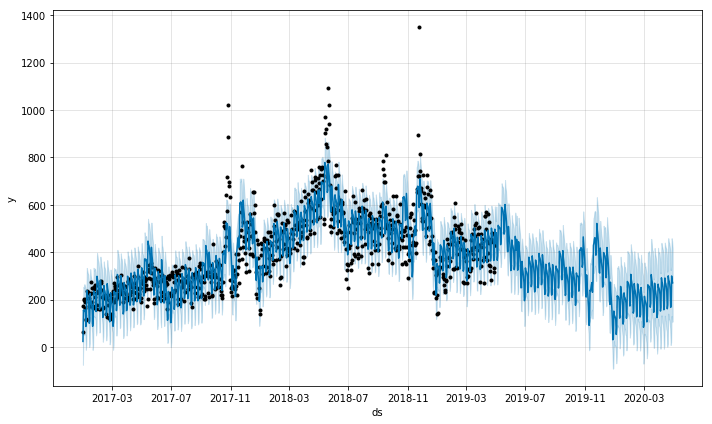

In [4]:
tbTrafegoOrganico.head()
m = Prophet(yearly_seasonality=18,holidays=holidays).fit(tbTrafegoOrganico)

future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
axes = [0,1000]
fig1 = m.plot(forecast)





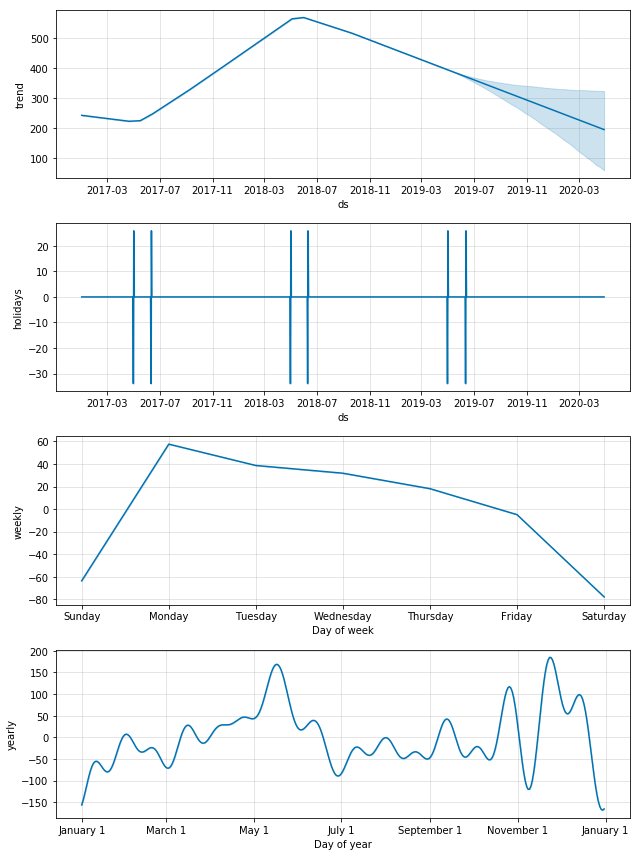

In [5]:
fig2 = m.plot_components(forecast)

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel("output_magic_feet.xlsx")
tbTrafego.to_excel("analytics_magic_feet.xlsx")


In [9]:
#converte para campo data 
tbTrafegoOrganico['ds'] = pd.to_datetime(tbTrafegoOrganico['ds'], errors='coerce')

forecast_total=pd.merge(forecast,tbTrafegoOrganico,on=['ds'],how='left')
import datetime
base =  datetime.date(2019, 5, 1)
numdays=45
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]
date_strings = [d.strftime('%Y-%m-%d') for d in date_list]


for i in date_strings:
    forecast_total.loc[(forecast_total['ds']==i),'y'] = tbTrafego.loc[(tbTrafego['Date']==i) & (tbTrafego['channel']=='Organic Search'),'Sessions']




In [10]:
tbTrafegoOrganicoTotal = tbTrafego.query('channel=="Organic Search" ')
tbTrafegoOrganicoTotal.rename(columns={'Sessions':'y','Date':'ds'},inplace=True)
tbTrafegoOrganicoTotal['ds'] = pd.to_datetime(tbTrafegoOrganicoTotal['ds'], errors='coerce')

forecast_total=pd.merge(forecast,tbTrafegoOrganicoTotal,on=['ds'],how='left')

C:\Users\Carolina Kuroda\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Carolina Kuroda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
forecast_total['y']=forecast_total['y'].astype(float)

In [11]:
import numpy as np
forecast_total['erro_perc_abs']=np.abs((forecast_total['yhat']-forecast_total['y'])/forecast_total['y'])
print("O erro é de " ) 
np.mean(forecast_total.loc[(forecast_total['ds']>='2019-05-01') & (forecast_total['ds']<'2019-06-01')]['erro_perc_abs'])


O erro é de 


0.10692887120160918

In [12]:

forecast_total.to_excel("analytics_magic_feet.xlsx")

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(forecast_total)

In [ ]:
#importing Pandas 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
forecast_total.iplot()